In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
news_data = pd.read_csv('historical news data/news_tesla.csv')

In [74]:
news_data.head()

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url
0,Chris Katje,NaN,2024-07-31T16:04:37Z,"Nancy Pelosi Loads Up On More Nvidia Shares, S...",40074372,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Nancy Pelosi and husband Paul Pelosi have adde...,"['KRUZ', 'MSFT', 'NANC', 'NVDA', 'TSLA']",2024-07-31T16:04:37Z,https://www.benzinga.com/general/politics/24/0...
1,The Arora Report,NaN,2024-07-31T15:38:54Z,Oversold Condition And China Loophole Overpowe...,40073627,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,"To gain an edge, this is what you need to know...","['AAPL', 'AMD', 'AMZN', 'BA', 'BTCUSD', 'DD', ...",2024-07-31T15:40:39Z,https://www.benzinga.com/markets/asia/24/07/40...
2,Gary Brode,NaN,2024-07-31T15:18:03Z,5 Things To Know In Investing This Week: The E...,40072916,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,We hit earnings season and with the Magnificen...,"['BTCUSD', 'CHGG', 'COUR', 'GOOG', 'LVS', 'NFL...",2024-07-31T15:18:06Z,https://www.benzinga.com/markets/penny-stocks/...
3,RIPS,NaN,2024-07-31T14:15:58Z,"Market Clubhouse Morning Memo - July 31st, 202...",40070509,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Good Morning Traders! In today&#39;s Market Cl...,"['AAPL', 'GOOGL', 'META', 'MSFT', 'NVDA', 'QQQ...",2024-07-31T14:16:37Z,https://www.benzinga.com/trading-ideas/24/07/4...
4,Benzinga Newsdesk,NaN,2024-07-31T13:18:14Z,Top 10 Trending Stocks On WallStreetBets As Of...,40068685,[],benzinga,NaN,"['AI', 'AMD', 'BA', 'MADE', 'META', 'MSFT', 'N...",2024-07-31T13:18:15Z,https://www.benzinga.com/trading-ideas/24/07/4...


In [77]:
news_data.isnull().sum()

author            0
content       30301
created_at        0
headline          0
id                0
images            0
source        15166
summary       13096
symbols           0
updated_at        0
url               0
dtype: int64

In [79]:
news_data['author'].value_counts()

author
Benzinga Newsdesk                         4946
Benzinga                                  4380
Shanthi Rexaline                          2155
Charles Gross                             1839
Benzinga Insights                         1281
                                          ... 
Jay Rubin                                    1
True Trading Group                           1
Michael Peres                                1
Utkarsh Roshan                               1
The Financially Independent Millennial       1
Name: count, Length: 233, dtype: int64

In [81]:
news_data.drop(columns = ['author','content','images','source','symbols','url','updated_at'],inplace=True)

In [83]:
news_data.head(5)

,created_at,headline,id,summary
0,2024-07-31T16:04:37Z,"Nancy Pelosi Loads Up On More Nvidia Shares, S...",40074372,Nancy Pelosi and husband Paul Pelosi have adde...
1,2024-07-31T15:38:54Z,Oversold Condition And China Loophole Overpowe...,40073627,"To gain an edge, this is what you need to know..."
2,2024-07-31T15:18:03Z,5 Things To Know In Investing This Week: The E...,40072916,We hit earnings season and with the Magnificen...
3,2024-07-31T14:15:58Z,"Market Clubhouse Morning Memo - July 31st, 202...",40070509,Good Morning Traders! In today&#39;s Market Cl...
4,2024-07-31T13:18:14Z,Top 10 Trending Stocks On WallStreetBets As Of...,40068685,NaN


In [85]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [118]:
import tensorflow as tf

In [111]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = TFAutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:

# Define the labels and their corresponding sentiment scores
labels = ["negative", "neutral", "positive"]
label_scores = {"negative": -1, "neutral": 0, "positive": 1}

def analyze_sentiment(text):
    # Tokenize the input text and convert to tensors
    inputs = tokenizer(text, return_tensors="tf")

    # Get model predictions
    outputs = model(**inputs)
    logits = outputs.logits

    # Calculate softmax to get probabilities
    probabilities = tf.nn.softmax(logits, axis=-1).numpy()[0]

    # Compute the sentiment score as a weighted sum of the probabilities
    sentiment_score = sum(probabilities[i] * label_scores[labels[i]] for i in range(len(labels)))

    return sentiment_score


# Function to determine the text to analyze
def get_text_to_analyze(row):
    return row['summary'] if pd.notna(row['summary']) else row['headline']

# Apply sentiment analysis to the appropriate text in each row
news_data['sentiment_score'] = news_data.apply(
    lambda row: analyze_sentiment(get_text_to_analyze(row)), axis=1
)

# Display the DataFrame with the new column
print(news_data)

In [ ]:
news_data['sentiment_score'] = news_data['sentiment_score'].round(4)

In [ ]:
# Function to extract date part and convert to datetime
def extract_and_convert_date(timestamp):
    date_str = timestamp.split('T')[0]
    return pd.to_datetime(date_str)

# Apply the function to the 'created_at' column
news_data['date'] = news_data['created_at'].apply(extract_and_convert_date)

In [ ]:
# Set the 'date' column as the index
news_data.set_index('date', inplace=True)
news_data.sort_index(inplace=True)
news_data.head()

In [ ]:
# Plot the sentiment scores over time
plt.figure(figsize=(16, 8))
plt.plot(news_data.index, news_data['sentiment_score'], label='sentiment')
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(loc='lower right')
plt.show()

In [14]:
news_data = pd.read_csv('sentiment_tesla_colab.csv')

In [16]:
news_data.head()

,created_at,headline,id,summary,sentiment_score,date
0,2021-03-19T07:16:36Z,NFT Craze A Reminder Of Tulip Mania? Keep Calm...,20249346,The non-fungible tokens are mirroring a period...,0.0000,2021-03-19
1,2021-04-08T14:02:55Z,"Facebook Beta Tests Hotline, Its Answer To Clu...",20538582,"Facebook, Inc. (NASDAQ: FB) is beta testing Ho...",0.0000,2021-04-08
2,2021-06-25T16:30:26Z,Did Billionaire Elon Musk Sell All His Mansion...,21714362,Despite a wealth of $162.8 billion and title o...,-0.9269,2021-06-25
3,2021-09-20T15:52:05Z,Elon Musk Fails To Get Buyer For $37.5M Bay Ar...,23013145,Elon Musk has taken his “last remaining house”...,-0.9724,2021-09-20
4,2021-11-02T20:43:25Z,This Psychedelics Stock Was Up More Than 20% L...,23838896,Psychedelics have picked up more and more mome...,0.9995,2021-11-02


In [20]:
news_sentiment_score = news_data.drop(columns = ['created_at', 'headline', 'id', 'summary'])

In [24]:
news_sentiment_score['date'].value_counts()

date
2024-07-24    59
2024-04-24    57
2024-01-25    54
2024-04-23    48
2024-04-29    45
              ..
2024-05-26     1
2023-12-31     1
2024-01-14     1
2024-03-03     1
2021-03-19     1
Name: count, Length: 270, dtype: int64

In [42]:
def average_sentiment_scores(df):

    # Ensure the date column is of datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Group by the date and calculate the mean sentiment score
    df_avg = df.groupby('date', as_index=False)['sentiment_score'].mean()

    return df_avg

# using the function 
daily_sentiment = average_sentiment_scores(news_sentiment_score)

# Display the DataFrame with averaged sentiment scores
print(daily_sentiment)
daily_sentiment2 = daily_sentiment

          date  sentiment_score
0   2021-03-19         0.000000
1   2021-04-08         0.000000
2   2021-06-25        -0.926900
3   2021-09-20        -0.972400
4   2021-11-02         0.999500
..         ...              ...
265 2024-07-27         0.333100
266 2024-07-28         0.037300
267 2024-07-29         0.189046
268 2024-07-30        -0.169089
269 2024-07-31         0.361750

[270 rows x 2 columns]


In [44]:
# Set the 'date' column as the index
daily_sentiment2.set_index('date', inplace=True)
daily_sentiment2.sort_index(inplace=True)

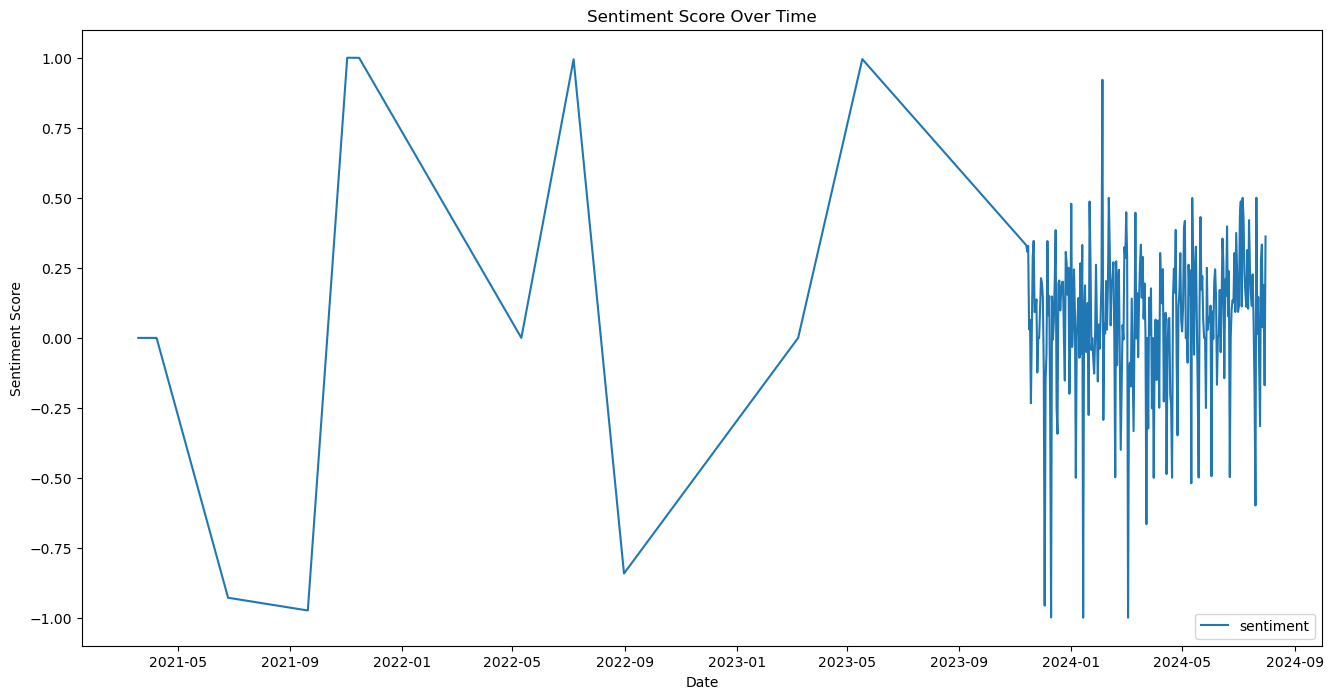

In [56]:
# Plot the sentiment scores over time
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(daily_sentiment2.index, daily_sentiment2['sentiment_score'], label='sentiment')
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(loc='lower right')
plt.show()

In [64]:
# Drop rows as the gap is very high
daily_sentiment = daily_sentiment.iloc[11:]

In [68]:
daily_sentiment.to_csv('daily_sentiment_scores.csv')